In [1]:
# illustrative example of use VeraRubin 

## Making a custom coadd

> Version: 1.0
> 
> Container Size: Large

> Description: In this notebook, we present an illustrative example of the use of the VeraRubin package, where we load a local custom coadd and perform comparisons with the original deep coadd.

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Loading modules
import numpy as np
import VeraRubin as vr

# Making a custom-coadd-filter

In [4]:
# Coordinates
# within x-degrees of RA, Dec
ra_deg, dec_deg = (53.2, -27.8)

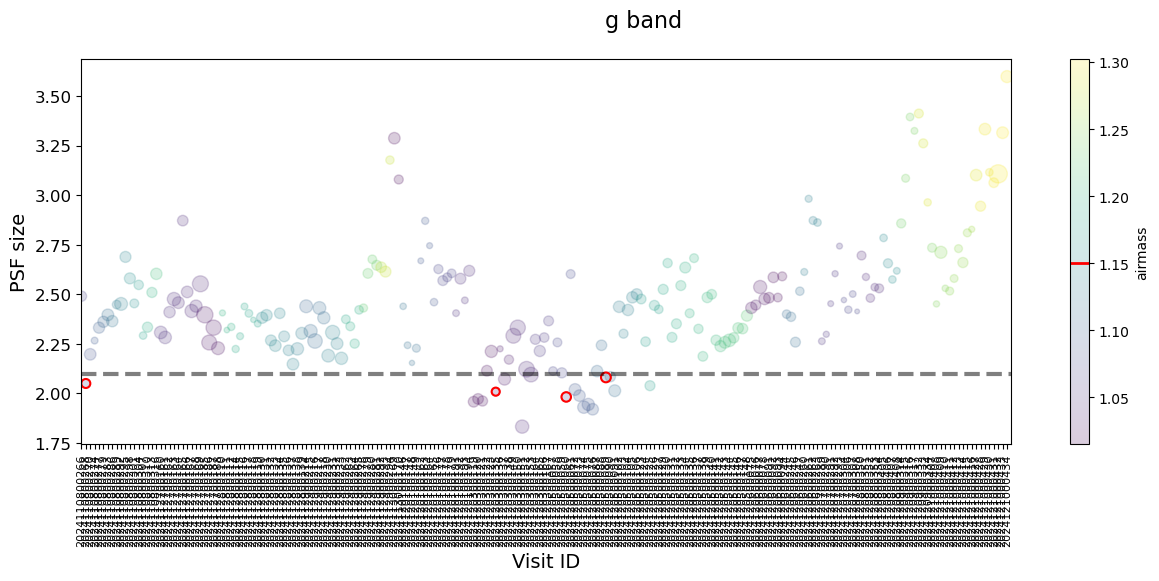

[Warning] NaNs in psfSigma_std for visit 2024121000425
[Warning] NaNs in psfSigma_mean for visit 2024121000425


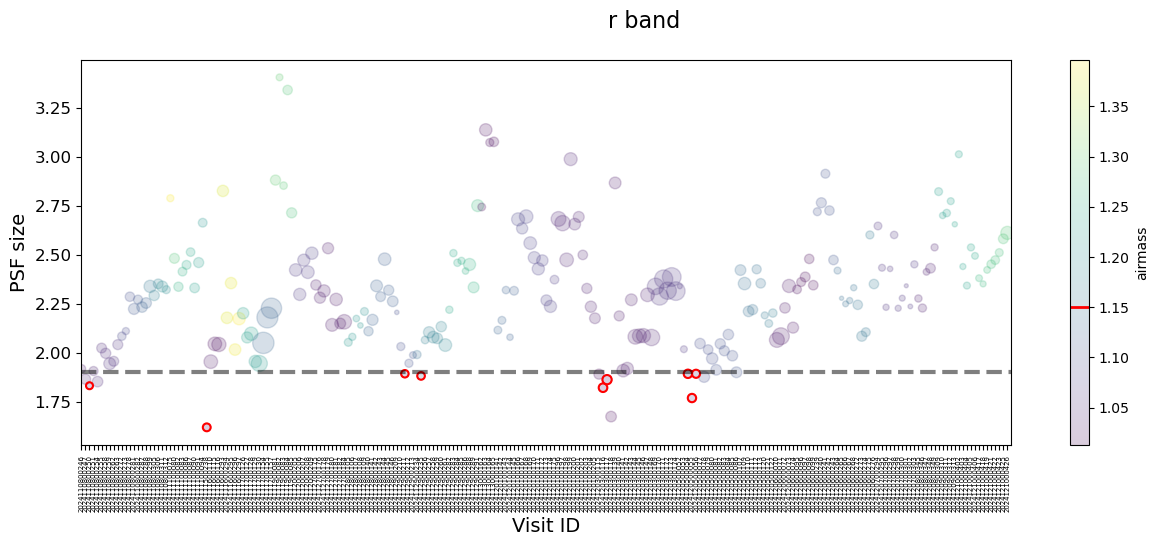

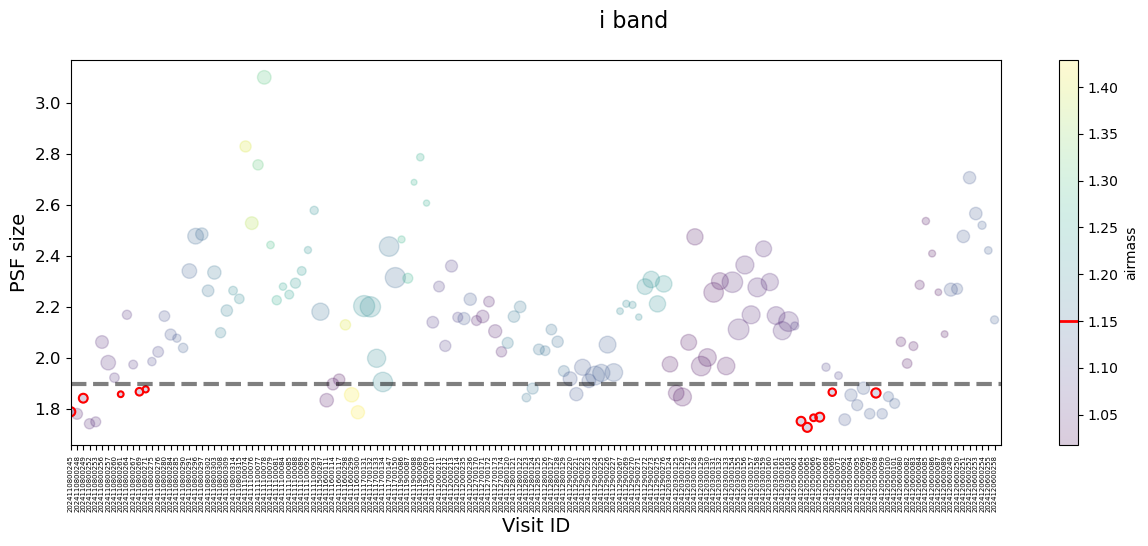

[INFO] Output collection: u/arestrada88/custom_coadd
[INFO] Query: tract = 5063 AND patch = 34 AND visit IN (2024110800268,2024120300135,2024120500060,2024120500089,2024110800250,2024111500238,2024112900211,2024112900235,2024120300116,2024120300117,2024120500054,2024120500055,2024120500056,2024110800245,2024110800249,2024110800261,2024110800269,2024110800271,2024120500064,2024120500065,2024120500066,2024120500067,2024120500069,2024120500098) AND skymap = 'lsst_cells_v1'
[INFO] Bands: ['g', 'r', 'i']


[INFO] Saved coadd metadata to: /home/arestrada88/local_repo/custom_coadd_info.txt


In [5]:
loc_data = ra_deg, dec_deg

bands = ['g', 'r', 'i']  # alternatively, you can use 'gri'
selection = {name: ['psfSigma', 'airmass'] for name in bands}

psfSigma_cut, psfStd_cut, airmass_cut = 1.9, 0.05, 1.15

filt_cut = {
    'g': {
    'psfSigma_mean': f' <= {2.1}',
    'psfSigma_std': f' <= {psfStd_cut}',
    'airmass': f' <= {airmass_cut}'
    },
    #
    'r': {
    'psfSigma_mean': f' <= {psfSigma_cut}',
    'psfSigma_std': f' <= {psfStd_cut}',
    'airmass': f' <= {airmass_cut}'
    },
    #
    'i': {
    'psfSigma_mean': f' <= {psfSigma_cut}',
    'psfSigma_std': f' <= {psfStd_cut}',
    'airmass': f' <= {airmass_cut}'
    }
}

# Alternatively, if you can apply the same filter to all bands, you can use:
# filt_cut_select = {
#    'psfSigma_mean': f' <= {psfSigma_cut}',
#    'psfSigma_std': f' <= {psfStd_cut}',
#    'airmass': f' <= {airmass_cut}'
#}
# filt_cut = {name: filt_cut_select for name in bands}

repoName = 'local_repo'
visits_selected_list, df_metrics_list, coadd_results = vr.custom_coadd_filter(
                    loc_data,
                    bands=bands,
                    sky_coordinates=True,
                    butler=None,
                    repository="dp1",
                    collections="LSSTComCam/DP1", 
                    type_coadd='deep_coadd',
                    statistics={'std', 'mean'},
                    selection=selection, filt_cut=filt_cut, 
                    my_collection_identifier='custom_coadd',
                    repo_name=repoName,
                    info=True, out=True, plot=True)